# Configuration

In [3]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar
from calendar import month_name as mn

In [2]:
#Read file

df_Sale = pd.read_excel('D:\TỰ HỌC DA\DATA\Project Python\sale0205.xlsx')
df_Sale.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,invoice_date
0,I100473,C607315,Female,51,Books,5,75.75,Debit Card,Mall of Istanbul,2021-01-01
1,I101088,C824542,Female,28,Toys,5,179.20,Debit Card,Kanyon,2021-01-01
2,I104292,C431059,Female,22,Clothing,5,1500.40,Debit Card,Emaar Square Mall,2021-01-01
3,I113208,C905558,Female,56,Technology,2,2100.00,Cash,Forum Istanbul,2021-01-01
4,I114774,C913265,Male,30,Souvenir,1,11.73,Cash,Metropol AVM,2021-01-01


# Descriptive statistics

In [4]:
#Kiểm tra sơ bộ dữ liệu

df_Sale.head()
df_Sale.tail()
df_Sale.info()
df_Sale.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90933 entries, 0 to 90932
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      90933 non-null  object        
 1   customer_id     90933 non-null  object        
 2   gender          90933 non-null  object        
 3   age             90933 non-null  int64         
 4   category        90933 non-null  object        
 5   quantity        90933 non-null  int64         
 6   price           90933 non-null  float64       
 7   payment_method  90933 non-null  object        
 8   shopping_mall   90933 non-null  object        
 9   invoice_date    90933 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 6.9+ MB


,age,quantity,price
count,90933.000000,90933.000000,90933.000000
mean,43.432978,3.004883,689.399127
std,14.990631,1.412633,940.241364
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# Data Synthesis

In [5]:
#Tạo thêm cột doanh thu 
#Chuẩn hóa dữ liệu bằng cách chia cho 1000 để tránh giá trị quá lớn

df_Sale ['Revenue'] = (df_Sale['price']*df_Sale['quantity'])/1000
df_Sale.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,invoice_date,Revenue
0,I100473,C607315,Female,51,Books,5,75.75,Debit Card,Mall of Istanbul,2021-01-01,0.37875
1,I101088,C824542,Female,28,Toys,5,179.20,Debit Card,Kanyon,2021-01-01,0.89600
2,I104292,C431059,Female,22,Clothing,5,1500.40,Debit Card,Emaar Square Mall,2021-01-01,7.50200
3,I113208,C905558,Female,56,Technology,2,2100.00,Cash,Forum Istanbul,2021-01-01,4.20000
4,I114774,C913265,Male,30,Souvenir,1,11.73,Cash,Metropol AVM,2021-01-01,0.01173


# Visualization

Text(0.5, 1.0, 'Total Revenue by sex and Category')

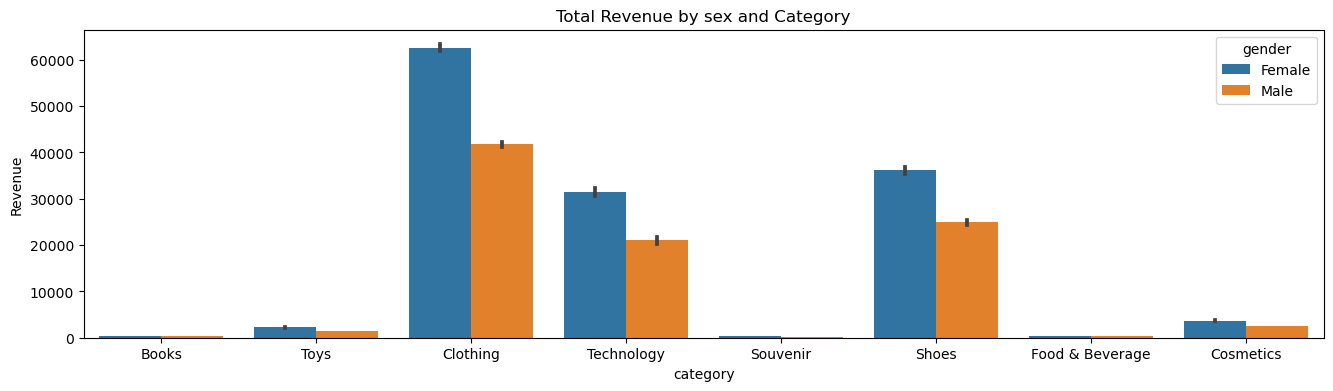

In [6]:
#Thống kê doanh thu theo giới tính và danh mục sản phẩm

plt.figure(figsize = (16,4))
sns.barplot (df_Sale, x='category',y='Revenue',hue = 'gender',estimator = sum)
plt.title('Total Revenue by sex and Category')

In [10]:
#Nhóm độ tuổi

def age_to_group(x):
    if (x<=20):
        return '< 20'
    elif ((x>20) & (x<=30)):
        return '20 to 30'
    elif ((x>30) & (x<=40)):
        return '30 to 40'
    elif ((x>40) & (x<50)):
        return '40 to 50'
    elif ((x>50) & (x<60)):
        return '50 to 60'
    else:
        return '> 60'
    
df_Sale['Age_group'] = df_Sale['age'].apply(age_to_group)

df_Sale.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,invoice_date,Revenue,Age_group
0,I100473,C607315,Female,51,Books,5,75.75,Debit Card,Mall of Istanbul,2021-01-01,0.37875,50 to 60
1,I101088,C824542,Female,28,Toys,5,179.20,Debit Card,Kanyon,2021-01-01,0.89600,20 to 30
2,I104292,C431059,Female,22,Clothing,5,1500.40,Debit Card,Emaar Square Mall,2021-01-01,7.50200,20 to 30
3,I113208,C905558,Female,56,Technology,2,2100.00,Cash,Forum Istanbul,2021-01-01,4.20000,50 to 60
4,I114774,C913265,Male,30,Souvenir,1,11.73,Cash,Metropol AVM,2021-01-01,0.01173,20 to 30


Text(0.5, 1.0, 'Total Revenue by Age group')

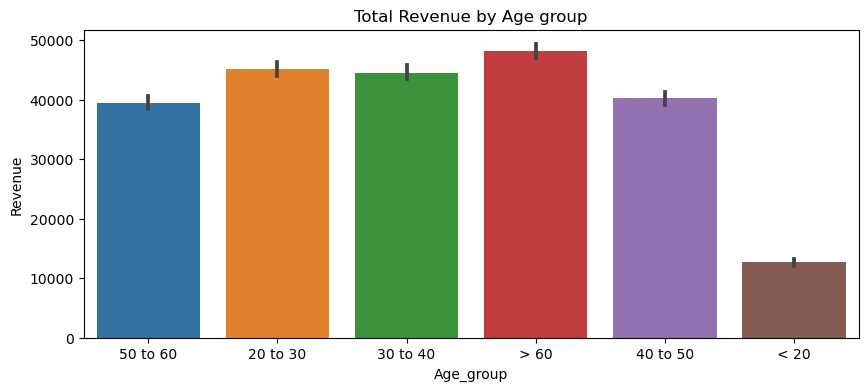

In [11]:
#Thống kê doanh thu theo nhóm tuổi

plt.figure(figsize=(10,4))
sns.barplot(df_Sale,x='Age_group',y='Revenue',estimator = sum)
plt.title('Total Revenue by Age group')

In [12]:
#Thống kê số giao dịch phân theo phương thức thanh toán

x, y = np.unique(df_Sale['payment_method'], return_counts = True)
print(x)
print(y)

['Cash' 'Credit Card' 'Debit Card']
[40621 31932 18380]


Text(0.5, 1.0, 'Total Order by Payment method')

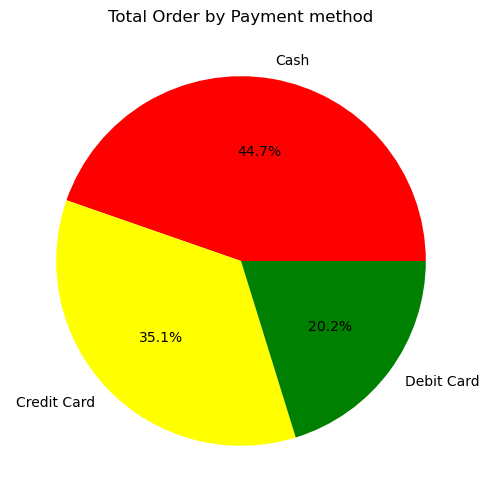

In [13]:
#Độ phổ biến của các phương thức thanh toán

plt.figure(figsize=(10,6))
plt.pie(y,
        labels = x, # Nhãn của các nhóm
        colors = ['red', 'yellow', 'green'], # Màu sắc của các nhóm
        autopct = '%1.1f%%') # Format hiển thị giá trị %)
plt.title("Total Order by Payment method")

Text(0.5, 1.0, 'Total Revenue by Shopping Mall')

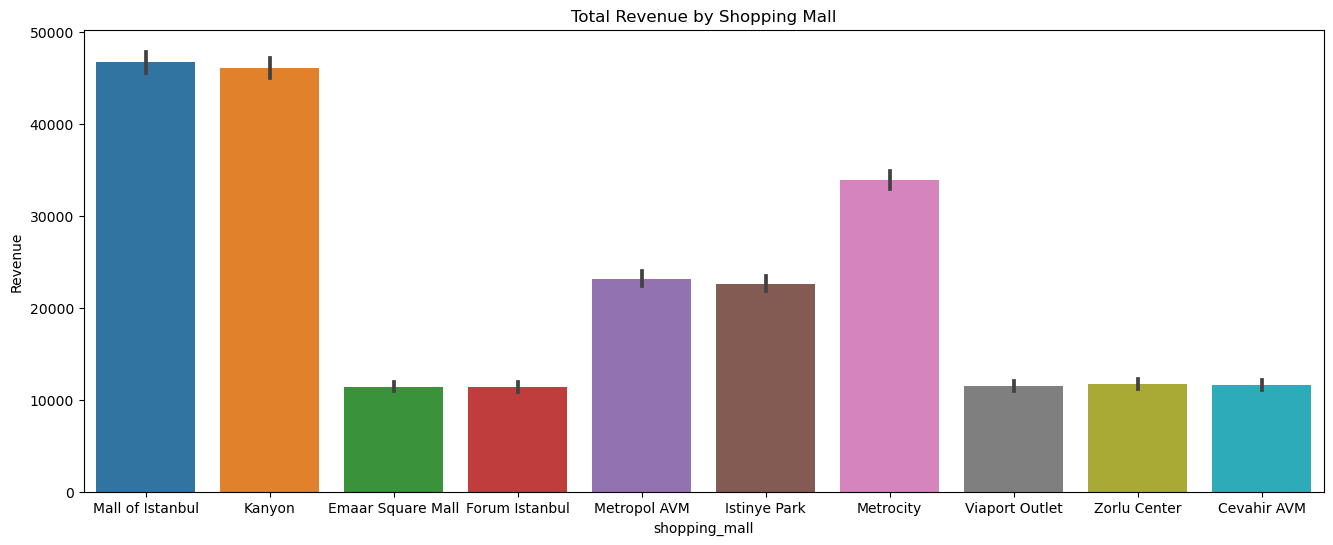

In [14]:
#Thống kê doanh thu theo nhóm tuổi

plt.figure(figsize=(16,6))
sns.barplot(df_Sale,x='shopping_mall',y='Revenue',estimator = sum)
plt.title('Total Revenue by Shopping Mall')

In [15]:
df_Sale['Month'] = df_Sale['invoice_date'].dt.month
df_Sale['Year'] = df_Sale['invoice_date'].dt.year
df_Sale[['invoice_date','Month','Year']].head()

,invoice_date,Month,Year
0,2021-01-01,1,2021
1,2021-01-01,1,2021
2,2021-01-01,1,2021
3,2021-01-01,1,2021
4,2021-01-01,1,2021


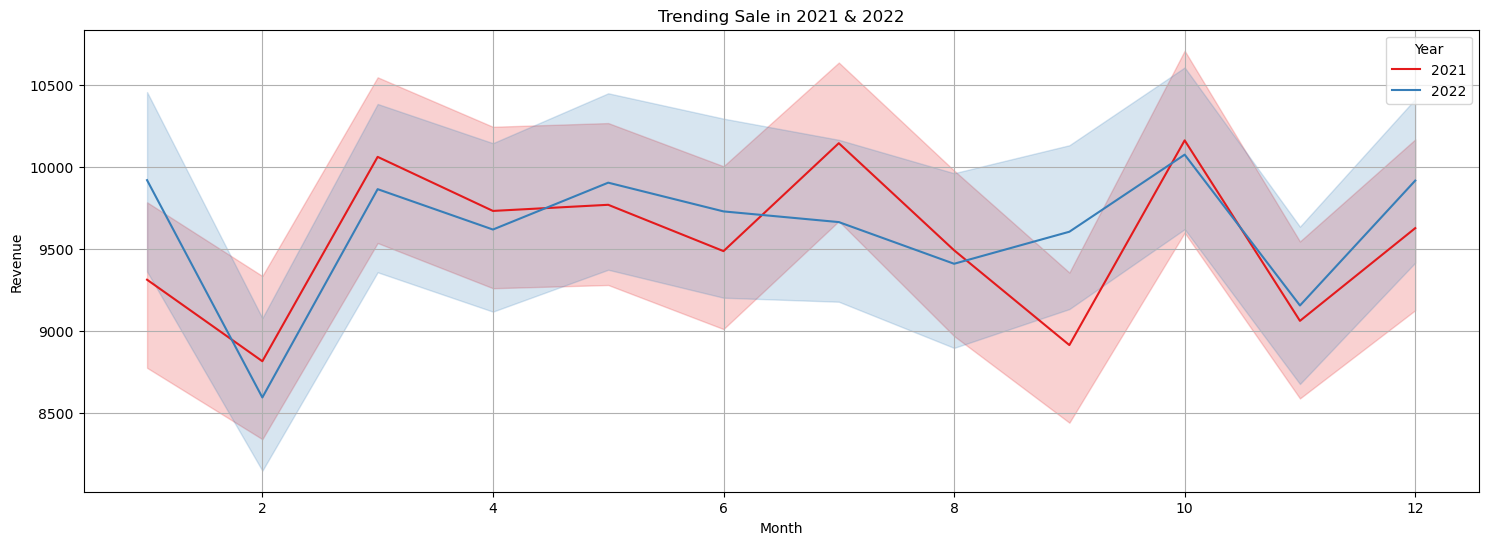

In [16]:
#Tổng quan doanh số bán hàng

plt.figure(figsize=(18,6))
sns.lineplot(df_Sale,x='Month',y='Revenue',hue = 'Year',estimator = sum,palette='Set1')
plt.title('Trending Sale in 2021 & 2022')
plt.grid()
plt.show()

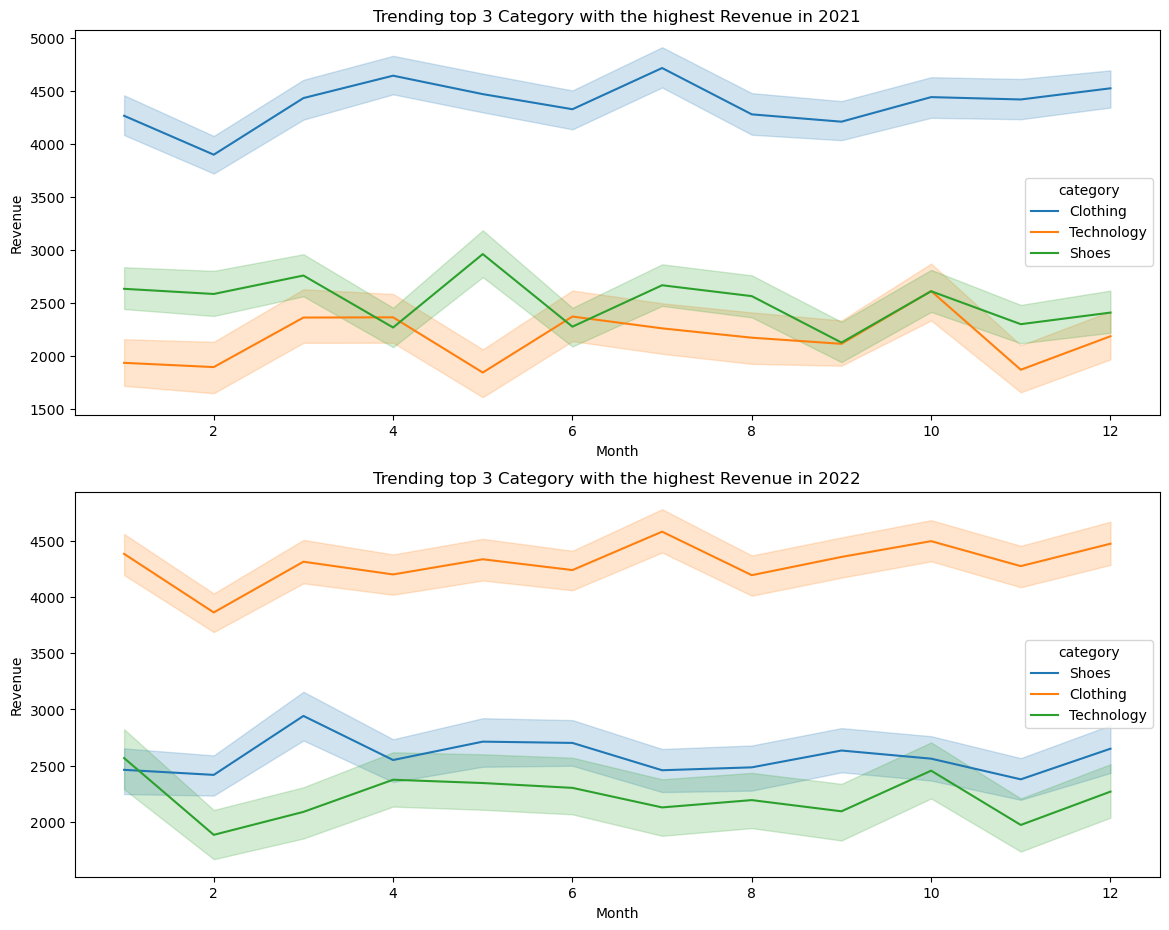

In [17]:
#Phân tích Top 3 doanh mục sản phẩm có doanh số bán hàng cao nhất

plt.figure(figsize=(14,11))
           
## 2021
df_year = df_Sale[(df_Sale['Year'] == 2021) & (df_Sale['category'].isin(['Clothing','Shoes','Technology']))]

plt.subplot(2, 1, 1)
sns.lineplot(df_year,x='Month',y='Revenue',hue = 'category',estimator = sum)
plt.title('Trending top 3 Category with the highest Revenue in 2021')
           
## 2022
df_year2 = df_Sale[(df_Sale['Year'] == 2022) & (df_Sale['category'].isin(['Clothing','Shoes','Technology']))]

plt.subplot(2, 1, 2)
sns.lineplot(df_year2,x='Month',y='Revenue',hue = 'category',estimator = sum)
plt.title('Trending top 3 Category with the highest Revenue in 2022')

plt.show()